In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')

%pylab inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns
from scipy import stats

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Populating the interactive namespace from numpy and matplotlib


# Проектная работа по модулю "Математика и статистика в Python"

### 1. Загрузить файл HR.csv.

In [2]:
hr = pd.read_csv('../data/HR.csv')

In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
hr.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [5]:
hr.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### 2. Расчитать основные статистики для переменных.
- Среднее
- Медиана
- Min/Max
- Сред. отклонение
- Мода

In [6]:
hr_stat = hr.agg(['mean', 'median', 'min', 'max', 'std']).T
hr_stat['mode'] = hr.mode().iloc[0].T

# Для минимального и максимального значения нужно использовать только численные значения
hr_stat['min'] = hr.min(numeric_only=True).T
hr_stat['max'] = hr.max(numeric_only=True).T

hr_stat

mean median    min    max       std   mode
satisfaction_level      0.612834   0.64   0.09    1.0  0.248631    0.1
last_evaluation         0.716102   0.72   0.36    1.0  0.171169   0.55
number_project           3.80305      4   2.00    7.0   1.23259      4
average_montly_hours      201.05    200  96.00  310.0   49.9431    135
time_spend_company       3.49823      3   2.00   10.0   1.46014      3
Work_accident            0.14461      0   0.00    1.0  0.351719      0
left                    0.238083      0   0.00    1.0  0.425924      0
promotion_last_5years  0.0212681      0   0.00    1.0  0.144281      0
sales                        NaN    NaN    NaN    NaN       NaN  sales
salary                       NaN    NaN    NaN    NaN       NaN    low

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

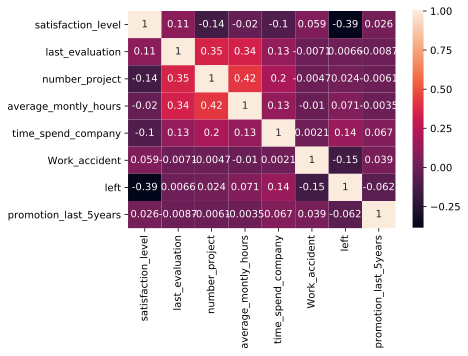

In [7]:
# Делаем выборку данных для построения матрицы (используем только числовые значения)
# Рассчитываем корреляцию и строим граффик.
hr_corr = hr.iloc[:,:-2].corr()
sns.heatmap(hr_corr, annot=True,
            xticklabels=hr_corr.columns.values,
            yticklabels=hr_corr.columns.values)

### 4. Визуализировать несколько взаимосвязей между переменными.

In [8]:
# Взаимосвязь между тем сколько часов в среднем в месяц работал человек и тем ушел ли он
sns.jointplot(x="average_montly_hours", y="left", data=hr, kind='reg')

In [9]:
# Взаимосвязь между тем сколько часов в среднем в месяц работал человек и количеством проектов
sns.jointplot(x="average_montly_hours", y="number_project", data=hr, kind='reg')

In [10]:
# Взаимосвязь между уровнем удволетворенности работника и его уходом
sns.jointplot(x="satisfaction_level", y="left", data=hr, kind='reg')

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [11]:
# Проверка взаимосвязи между тем сколько часов в среднем в месяц работал человек 
# и тем ушел ли он
stats.ttest_rel(hr['average_montly_hours'], hr['left'])  

Ttest_relResult(statistic=492.7132617886167, pvalue=0.0)

In [12]:
# Проверка взаимосвязи между тем сколько часов в среднем в месяц работал человек 
# и количеством проектов
stats.ttest_rel(hr['average_montly_hours'], hr['number_project'])  

Ttest_relResult(statistic=488.5963175006558, pvalue=0.0)

In [13]:
# Проверка взаимосвязи между между уровнем удволетворенности работника и его уходом
stats.ttest_rel(hr['satisfaction_level'], hr['left'])  

Ttest_relResult(statistic=80.44678339508334, pvalue=0.0)

### 6. Рассчитать сколько работников работает в каждом департаменте

In [14]:
hr.groupby('sales').agg({'left': 'count'}).rename(columns={'left': 'count'})

count
sales             
IT            1227
RandD          787
accounting     767
hr             739
management     630
marketing      858
product_mng    902
sales         4140
support       2229
technical     2720

### 7. Показать распределение сотрудников по зарплатам

In [15]:
df = hr.groupby('salary').agg({'left': 'count'}).rename(columns={'left': 'count'}).reset_index()
df

salary  count
0    high   1237
1     low   7316
2  medium   6446

In [16]:
data = [go.Bar(
            x=df['salary'],
            y=df['count']
    )]

iplot(data, filename='ex_7')

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [17]:
df = hr[['salary', 'sales', 'left']].groupby(['sales', 'salary']).count().rename(columns={'left': 'count'})
df

count
sales       salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

In [18]:
data = [go.Bar(x=df['count'][cat].index,y=df['count'][cat].values, name=cat) for cat in df.index.levels[0]]
layout = go.Layout(barmode='group')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='bar')

### 9. Сколько сотрудников покинули компанию

In [19]:
hr[hr['left'] == 1].count().iloc[0] 

3571

### 10. Проверить несколько гипотез данных, чтобы понять почему сотрудники покидают компанию

In [20]:
df_l = hr[hr['left'] == 1].reset_index()['average_montly_hours']
df_nl = hr[hr['left'] == 0].reset_index()['average_montly_hours']
stats.ttest_ind(df_l, df_nl)  

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

In [21]:
df_l = hr[hr['left'] == 1].reset_index()['satisfaction_level']
df_nl = hr[hr['left'] == 0].reset_index()['satisfaction_level']
stats.ttest_ind(df_l, df_nl)  

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [22]:
df_l = hr[hr['left'] == 1].reset_index()['number_project']
df_nl = hr[hr['left'] == 0].reset_index()['number_project']
stats.ttest_ind(df_l, df_nl) 

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)

In [23]:
df_l = hr[hr['left'] == 1].reset_index()['Work_accident']
df_nl = hr[hr['left'] == 0].reset_index()['Work_accident']
stats.ttest_ind(df_l, df_nl) 

Ttest_indResult(statistic=-19.165804033090176, pvalue=6.613049400453939e-81)